# Aim

Figure out how loading TESS data works.

In [3]:
# https://tev.mit.edu/data/collection/193/
# https://exofop.ipac.caltech.edu/tess/view_toi.php
import sys
sys.path.append('../dev')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils import get_tess_catalog

In [4]:
tois = get_tess_catalog()
tois.keys()

Index(['toi', 'tid', 'tfopwg_disp', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra',
       'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec', 'st_pmdecerr1',
       'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid', 'pl_tranmiderr1',
       'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh', 'pl_trandurherr1',
       'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_trandeplim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2',
       'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist',
       'st_disterr1', 'st_disterr2', 'st_distlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_logg', 'st_loggerr1', 'st_loggerr2',
       'st_logglim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
       'toi_created', 'rowupda

In [36]:
tois = tois[np.isfinite(tois['st_teff'])]

In [46]:
star_classes = np.array(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
star_temps   = np.array([30000, 10000, 7500, 6000, 5200, 3700, 2400])
star_class = star_classes[np.digitize(tois['st_teff'], star_temps)].astype(dtype=str)

In [47]:
np.unique(star_class, return_counts=True)

(array(['A', 'B', 'F', 'G', 'K', 'M', 'O'], dtype='<U1'),
 array([181,  21, 602, 655, 396, 153,   2]))

(array([153., 396., 655., 602., 181.,  21.]),
 array([ 2400,  3700,  5200,  6000,  7500, 10000, 30000]),
 <a list of 6 Patch objects>)

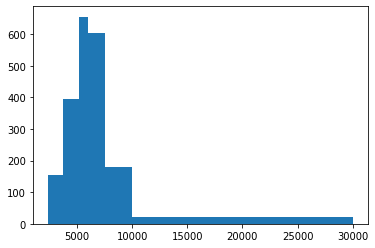

In [50]:
plt.hist(tois.st_teff, bins=np.flip(star_temps))

In [5]:
tois.ra[0]

112.357708

(array([516., 127., 216., 246.,  92., 350., 272., 111.,  54.,  57.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

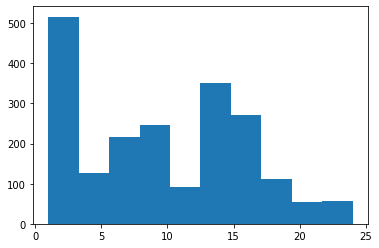

In [31]:
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
from tqdm.notebook import tqdm

sectors = np.empty(tois.ra.shape)
i = 0
for ra, dec in tqdm(zip(tois.ra, tois.dec), total=len(tois.ra)):
    sector = Tesscut.get_sectors(coordinates=SkyCoord(ra, dec, unit='deg'))[0][1]
    sectors[i] = sector
    i += 1
    
plt.hist(sectors)

In [23]:
SkyCoord(ra, dec, unit='deg').ra

<Longitude 304.800032 deg>

In [28]:
tois.ra[196]

289.23868799999997

In [33]:
np.save('sectors.npy', sectors)